In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
fake_data = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true_data = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true_data['class'] = 1
fake_data['class'] = 0

In [7]:
# Merging both the datasets
data = pd.concat([true_data,fake_data])

After merging dataframes, we'll shuffle the entries randomly because we will be splitting the data into train and test sets and we need both the splits to be balanced.

In [8]:
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Let us see how balanced our dataset is.

## Data Cleaning and Exploratory Analysis

Text(0, 0.5, 'No. of particulars')

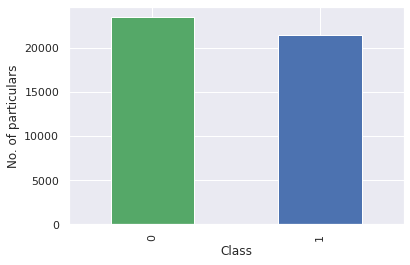

In [9]:
data['class'].value_counts().plot(kind = 'bar', color = ['g','b'])
plt.xlabel('Class')
plt.ylabel('No. of particulars')

In [10]:
# Checking for missing values
data.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [11]:
data['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

The 'News' subject contains all kinds of news in general and is not categorized, also since we have merged two datasets the subject column contains different names for all topics. So, we would be better off dropping the subject  column.

In [12]:
# Merging the title and text column
data['text'] = data['title'] + " " + data['text']

# Dropping the title, subject and date columns
data.drop(columns = ['title','date','subject'], inplace = True)

In [13]:
data.head()

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


### Initial Data Split (Train and Test sets)

In [14]:
split = np.random.rand(len(data)) < 0.7
train = data[split]
test = data[~split]

In [15]:
# Checking whether target classes are balanced
# If they are balanced in the train set, then we do not need to check the test set as well
train['class'].value_counts()

0    16375
1    14985
Name: class, dtype: int64

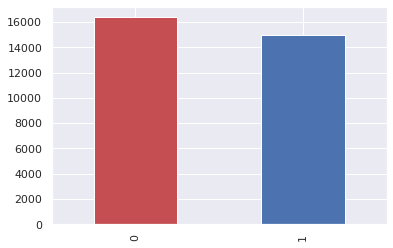

In [16]:
train['class'].value_counts().plot(kind = 'bar', color = ['r','b'])

The target classes are balanced

In [17]:
train.head()

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
6,"Trump says Russia probe will be fair, but time...",1


In [18]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Text Data Cleaning

In [19]:
import re
import string

In [20]:
# Removing whitespaces and single word characters from the text
train['text'] = train.text.apply(lambda x: re.sub(r'[^\w\s]', '',x))
test['text'] = test.text.apply(lambda x: re.sub(r'[^\w\s]', '',x))

In [21]:
train['text'] = [re.sub(r'\b\w{1,3}\b', '', c) for c in train['text']]
test['text'] = [re.sub(r'\b\w{1,3}\b', '', c) for c in test['text']]

In [22]:
# Removing numeric characters
train['text'] = [re.sub('\d','',n) for n in train['text']]
test['text'] = [re.sub('\d','',n) for n in test['text']]

In [23]:
# Converting all text to lower case characters
train['text'] = [t.lower() for t in train['text']]
test['text'] = [t.lower() for t in test['text']]

In [24]:
train['text'].dropna(inplace = True)
test['text'].dropna(inplace = True)

### Tokenization and Stopwords removal 

In [26]:
import nltk
from nltk.tokenize import word_tokenize

# Word Tokenization
train['text'] = [word_tokenize(i) for i in train['text']]
test['text'] = [word_tokenize(i) for i in test['text']]

In [27]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
train['text'] = [[i for i in j if not i in stop_words] for j in train['text']]
test['text'] = [[i for i in j if not i in stop_words] for j in test['text']]

### Vectorization (Converting word to numbers)

Some of the options at our disposal:
#### Bag of words
#### TF-IDF vectorization
#### Tokenizer (Tensorflow(keras) tokenizer)
#### word2vec
#### GloVe vectors

First, using simple tokenization i.e. assigning a number to every single word in our text.

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [30]:
train['text'] = train['text'].apply(lambda x : ' '.join(x))
test['text'] = test['text'].apply(lambda x : ' '.join(x))

In [31]:
X = train.text
test_X = test.text
train_labels = train['class'].values
test_labels = test['class'].values

In [32]:
from collections import Counter

# Finding the number of unique word in the corpus
def word_counter(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [33]:
counter = word_counter(X)
words = len(counter)

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['text'])

In [35]:
train_X = tokenizer.texts_to_sequences(train['text'])

In [36]:
# Numeric tokens for the first 25 words of the the 5th news entry in our train set
train_X[5][:25]

[1202,
 8029,
 56,
 2747,
 350,
 953,
 1090,
 8,
 1372,
 70,
 100,
 8029,
 220,
 4785,
 1202,
 2747,
 12,
 56,
 341,
 6,
 296,
 564,
 1090,
 15,
 953]

In [37]:
test_X = tokenizer.texts_to_sequences(test['text'])

In [38]:
test_labels = test['class'].values

In [39]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break        

said -> 1
trump -> 2
would -> 3
president -> 4
people -> 5
state -> 6
also -> 7
reuters -> 8
donald -> 9
house -> 10


### Sequence Padding

In [40]:
nos = np.array([len(x) for x in train_X])
len(nos[nos  < 500])

29843

In [41]:
len(counter)

176653

In [42]:
from keras.preprocessing.sequence import pad_sequences

#Lets keep all news with upto 500 words, add padding to news with less than 500 words
maxlen = 500 

#Making all news of size max length defined above
train_X = pad_sequences(train_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

Using TensorFlow backend.


In [43]:
# All sequences have been made of length 500
# if a news had more than 500 words they have been truncated to 500
# if a news had less than 500 that sequence has been padded with 0
len(train_X[20])

500

In [44]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam
import tensorflow as tf

def leaky_relu(z, name = None):
    return tf.maximum(0.01*z,z, name = name)

model = Sequential()

model.add(Embedding(words+1,32,input_length = 500)) # embedding layer
model.add(LSTM(64)) # RNN layer
#model.add(Dense(units = 32 , activation = leaky_relu)) # Dense layer with leaky_relu activation
model.add(Dense(1, activation = 'sigmoid'))

optimizer = Adam(learning_rate = 3e-4)

model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           5652928   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 5,677,825
Trainable params: 5,677,825
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X,train_labels) 

In [47]:
model.fit(train_X, train_labels, validation_split=0.2, epochs=10)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25088 samples, validate on 6272 samples
Epoch 1/10
25088/25088 [==============================] - 418s 17ms/step - loss: 0.2010 - accuracy: 0.9273 - val_loss: 0.2553 - val_accuracy: 0.9445
Epoch 2/10
25088/25088 [==============================] - 418s 17ms/step - loss: 0.0328 - accuracy: 0.9933 - val_loss: 0.2949 - val_accuracy: 0.9461
Epoch 3/10
25088/25088 [==============================] - 421s 17ms/step - loss: 0.0272 - accuracy: 0.9957 - val_loss: 0.4226 - val_accuracy: 0.9043
Epoch 4/10
25088/25088 [==============================] - 417s 17ms/step - loss: 0.0198 - accuracy: 0.9963 - val_loss: 0.1474 - val_accuracy: 0.9683
Epoch 5/10
25088/25088 [==============================] - 419s 17ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.2194 - val_accuracy: 0.9471
Epoch 6/10
25088/25088 [==============================] - 419s 17ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.1757 - val_accuracy: 0.9638
Epoch 7/10
25088/25088 [==============================] -

In [48]:
predictions = model.predict_classes(test_X)

In [50]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(test_labels,predictions)

0.9862608952577929

In [52]:
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7106
           1       0.97      1.00      0.99      6432

    accuracy                           0.99     13538
   macro avg       0.99      0.99      0.99     13538
weighted avg       0.99      0.99      0.99     13538



RNN(LSTM) layer, Adam optimization and a dense layer with sigmoid activation and running the network for 10 successive iterations yields ~99% accuracy on the test set.